In [1]:
#Importando Librerias

import numpy as np
import pandas as pd

In [2]:
# obteniendo los datos
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [3]:
#print(df_test.head())
print(df_test.shape)
print(df_train.shape)
#print(df_train.info())
print(pd.isnull(df_train).sum())
print(pd.isnull(df_train).sum())

(418, 11)
(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Visualizando las estadísticas del dataset
print(df_train.describe())
print(df_test.describe())
'''
Cómo los datos tienen una media relativamente razonable se puede deducir que cualquier información en el ds de entrenamient
'''


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

'\nCómo los datos tienen una media relativamente razonable se puede deducir que cualquier información en el ds de entrenamient\n'

In [5]:
### Preparación de datos ####

# Cambio cambio de datos de sexos a números
df_train['Sex'].replace(['female','male'],[0,1],inplace=True)
df_test['Sex'].replace(['female','male'],[0,1],inplace=True)
# Cambio cambio de datos de sexos a números
df_train['Embarked'].replace(['Q','S','C'],[0,1,2],inplace=True)
df_test['Embarked'].replace(['Q','S','C'],[0,1,2],inplace=True)


In [6]:

# Reemplazo los datos faltantes en la edad por la media de la columna 'edad' valga la redundancia :)
print(df_train["Age"].mean())
print(df_test["Age"].mean())
promedio = 30;
df_train["Age"] = df_train['Age'].replace(np.nan,promedio)
df_test["Age"]  = df_train['Age'].replace(np.nan,promedio)
#Creando grupos de acuerdo a bandas de las edades que me identifican.
bins = [0,8,15,18,25,40,60,100]
names = ['1','2','3','4','5','6','7']
df_train['Age'] = pd.cut(df_train['Age'],bins,labels = names)
df_test['Age'] = pd.cut(df_test['Age'],bins,labels = names)
#Eliminando la columna cabina porque tienen muchos datos y puede influir negativamente 
#En mi inferencia.
df_train.drop(['Cabin'],axis = 1,inplace=True)
df_test.drop(['Cabin'],axis = 1,inplace=True)

#Elimino las columnas que considero que no son necesarias para el análisis
df_train = df_train.drop(['PassengerId','Name','Ticket'],axis=1)
df_test = df_test.drop(['Name','Ticket'],axis=1)

#Se Elimina las filas con datos perdidos (todo es vacio)
df_train.dropna(axis=0,how='any',inplace=True)
df_test.dropna(axis=0,how='any',inplace=True)

29.69911764705882
30.272590361445783


In [7]:
# verico los datos
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())

print(df_train.shape)
print(df_test.shape)

print(df_train.head())
print(df_test.head())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(889, 8)
(417, 8)
   Survived  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0         0       3    1   4      1      0   7.2500       1.0
1         1       1    0   5      1      0  71.2833       2.0
2         1       3    0   5      0      0   7.9250       1.0
3         1       1    0   5      1      0  53.1000       1.0
4         0       3    1   5      0      0   8.0500       1.0
   PassengerId  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0          892       3    1   4      0      0   7.8292         0
1          893       3    0   5      1      0   7.0000         1
2          894       2    1   5      0      0   9.6875         0
3          895       3    1   5      0      0   8.6625         1
4          

In [8]:
'''
Aplicando los algoritmos de Machine Learning
- Regressión lineal 
- Support Vector Machine
- K - Neighbors.
'''
# Importando las librerias 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


(889, 7)
(889,)
Precisión Regresión Logística
0.8087201125175809
Precisión Sporte de vectores
0.6765119549929677
Precisión Vecino más cercano
0.8790436005625879


D:\Users\nahim\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


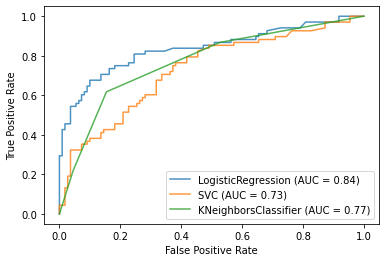

In [11]:
# Separo la columna con la información de los sobrevivientes
x = np.array(df_train.drop(['Survived'],1))
y = np.array(df_train['Survived'])

#Separo los datos de "train" en entrenamiento y Prueba para realizar los algoritmos
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(x.shape) #datos a entrenar
print(y.shape) #resultado

#Regresión Logística
logreg = LogisticRegression() #defino el metodo
logreg.fit(x_train,y_train) #Training
y_pred = logreg.predict(x_test) # Testing
print("Precisión Regresión Logística")
print(logreg.score(x_train,y_train))
#Support Vector Machine 
svc = SVC() #defino el metodo
svc.fit(x_train,y_train) #Training
y_pred = svc.predict(x_test) # Testing
print("Precisión Sporte de vectores")
print(svc.score(x_train,y_train))
#K Neighbors
knn = KNeighborsClassifier(n_neighbors=3) #defino el metodo
knn.fit(x_train,y_train) #Training
y_pred = svc.predict(x_test) # Testing
print("Precisión Vecino más cercano")
print(knn.score(x_train,y_train))


from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
ax = plt.gca()
log_disp = plot_roc_curve(logreg, x_test, y_test, ax=ax,alpha=0.8)
svc_disp = plot_roc_curve(svc, x_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(knn, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [12]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [14]:
model = models(x_train,y_train)

D:\Users\nahim\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0]Logistic Regression Training Accuracy: 0.8087201125175809
[1]K Nearest Neighbor Training Accuracy: 0.8438818565400844
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.790436005625879
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6765119549929677
[4]Gaussian Naive Bayes Training Accuracy: 0.7918424753867792
[5]Decision Tree Classifier Training Accuracy: 0.9549929676511955
[6]Random Forest Classifier Training Accuracy: 0.939521800281294


In [19]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[99 11]
 [24 44]]
Model[0] Testing Accuracy = "0.8033707865168539 !"

[[95 15]
 [28 40]]
Model[1] Testing Accuracy = "0.7584269662921348 !"

[[95 15]
 [26 42]]
Model[2] Testing Accuracy = "0.7696629213483146 !"

[[100  10]
 [ 43  25]]
Model[3] Testing Accuracy = "0.702247191011236 !"

[[91 19]
 [18 50]]
Model[4] Testing Accuracy = "0.7921348314606742 !"

[[94 16]
 [24 44]]
Model[5] Testing Accuracy = "0.7752808988764045 !"

[[98 12]
 [25 43]]
Model[6] Testing Accuracy = "0.7921348314606742 !"

